In [90]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm
import seaborn as sns
sns.set_palette('hls', 10)
import matplotlib.cm as cm

In [ ]:
class HopfieldNetwork(object):      
    def train_weights(self, train_data):
        print("Start to train weights...")
        num_data =  len(train_data)
        self.num_neuron = train_data[0].shape[0]
        
        # initialize weights
        W = np.zeros((self.num_neuron, self.num_neuron))
        rho = np.sum([np.sum(t) for t in train_data]) / (num_data*self.num_neuron)
        
        # Hebb rule
        for i in tqdm(range(num_data)):
            t = train_data[i] - rho
            W += np.outer(t, t)
        
        # Make diagonal element of W into 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        W /= num_data
        
        self.W = W 
    
    def predict(self, data, num_iter=20, threshold=0, asyn=False):
        print("Start to predict...")
        self.num_iter = num_iter
        self.threshold = threshold
        self.asyn = asyn
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return predicted
    
    def _run(self, init_s):
        if self.asyn==False:
            """
            Synchronous update
            """
            # Compute initial state energy
            s = init_s

            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                # Update s
                s = np.sign(self.W @ s - self.threshold)
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
        else:
            """
            Asynchronous update
            """
            # Compute initial state energy
            s = init_s
            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                for j in range(100):
                    # Select random neuron
                    idx = np.random.randint(0, self.num_neuron) 
                    # Update s
                    s[idx] = np.sign(self.W[idx].T @ s - self.threshold)
                
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
    
    
    def energy(self, s):
        return -0.5 * s @ self.W @ s + np.sum(s * self.threshold)

    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.coolwarm)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()

In [95]:
train = parser('./dataSet/basic_training.txt')
test = parser('./dataSet/basic_testing.txt')
for i in range(len(train)):
    train[i] = preprocessing(train[i])
    test[i] = preprocessing(test[i])
    train[i] = train[i].flatten()
    test[i] = test[i].flatten()

model = HopfieldNetwork()
model.train_weights(train)

In [162]:
def bonus_parser(filename):
    weights = []
    cnt = 0
    with open(filename) as file_Obj:
        strs = []
        for line in file_Obj:
            if cnt == 10:
                data = np.array(strs)
                data = np.where(data == " " ,-1,1)
                weights.append(data)
                strs = []
                cnt = 0
            else:
                lines = []
                if line[-1] == '\n':
                    lines = list(line[:-1])
                else:
                    lines = list(line)
                cnt = cnt + 1
                strs.append(lines)
        weights.append(data)
    return weights

In [178]:
bouns_train = bonus_parser('./dataSet/bonus_training.txt')
bouns_train = bonus_parser('./dataSet/bonus_training.txt')
#train = parser_basic_training('./dataSet/basic_training.txt')
#plt.imshow(np.where(train[0]<1, 1, 0), cmap='gray')

In [94]:
def preprocessing(data):
    if data.shape[0] > data.shape[1]:
        negative = np.zeros((int(data.shape[0]), int(data.shape[0] - data.shape[1]) ))
        data = np.hstack([data,negative])
    else:
        negative = np.zeros((int(data.shape[1] - data.shape[0]) , int(data.shape[1])))
        data = np.vstack([data,negative])
    data[data == 0] = -1
    return data

In [ ]:
def reshape(data):
    dim = int(np.sqrt(len(data)))
    data = np.reshape(data, (dim, dim))
    return data

In [172]:
predicted = model.predict(test,  threshold=10, asyn=False)

Start to predict...
100%|██████████| 3/3 [00:00<00:00, 142.94it/s]


In [173]:
for i in range(len(predicted)):
    predicted[i] = reshape(predicted[i])

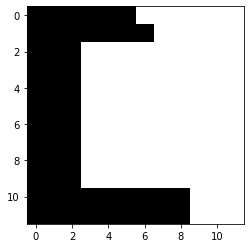

In [174]:
plt.imshow(np.where(predicted[2]<1, 1, 0), cmap='gray')

In [167]:
def parser(filename):
    weights = []
    cnt = 0
    with open(filename) as file_Obj:
        strs = []
        for line in file_Obj:
            if cnt == 12:
                data = np.array(strs)
                data = np.where(data == " " ,-1,1)
                weights.append(data)
                strs = []
                cnt = 0
            else:
                lines = []
                if line[-1] == '\n':
                    lines = list(line[:-1])
                else:
                    lines = list(line)
                cnt = cnt + 1
                strs.append(lines)
        weights.append(data)
    return weights